<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

# <center>Régression linéaire simple</center>


#### À propos de ce bloc-notes
Dans ce cahier, nous apprenons à utiliser scikit-learn pour implémenter une régression linéaire simple. Nous téléchargeons un ensemble de données lié à la consommation de carburant et aux émissions de dioxyde de carbone des voitures. Ensuite, nous divisons nos données en ensembles d'entraînement et de test, créons un modèle à l'aide d'un ensemble d'entraînement, évaluons notre modèle à l'aide d'un ensemble de test et enfin utilisons le modèle pour prédire une valeur inconnue.


### Importation des packages nécessaires

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Téléchargement des données
Pour télécharger les données, nous utiliserons l'adesse Web: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
ensuite nous metterons le fichier téléchargé dans jupyter localhost.

__Le saviez-vous?__ En ce qui concerne le Machine Learning, vous travaillerez probablement avec de grands ensembles de données. En tant qu'entreprise, où pouvez-vous héberger vos données? IBM offre une opportunité unique aux entreprises, avec 10 To d'IBM Cloud Object Storage: [Inscrivez-vous maintenant gratuitement](http://cocl.us/ML0101EN-IBM-Offer-CC)

## Comprendre les données

### `FuelConsumptionCo2.csv`:
Nous avons téléchargé un ensemble de données sur la consommation de carburant, **`«FuelConsumption.csv»`**, qui contient les cotes de consommation de carburant propres au modèle et les émissions de dioxyde de carbone estimées pour les véhicules légers neufs vendus au détail au Canada. [Source de données](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)
- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Lire les données

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Exploration des données
Commençons par une exploration descriptive de nos données.

In [3]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Sélectionons certaines fonctionnalités pour en explorer davantage.

In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Nous pouvons tracer chacune de ces caractéristiques:

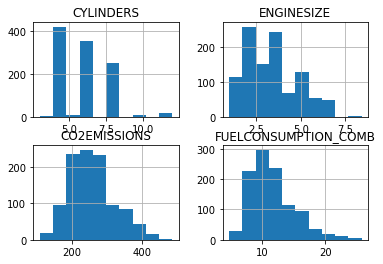

In [5]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Maintenant, traçons chacune de ces caractéristiques par rapport à l'émission, pour voir à quel point leur relation est linéaire:

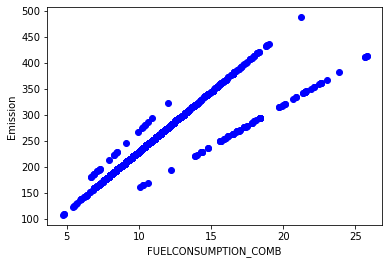

In [6]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

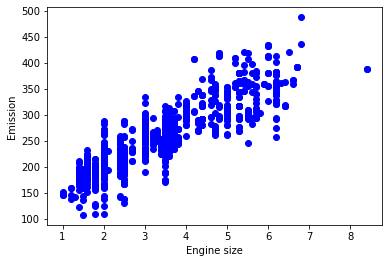

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Practice
Plot __CYLINDER__ vs the Emission, to see how linear is their relation:

In [1]:
# write your code here

Double-cliquez __ici__ pour voir la solution.

<!-- Your answer is below:
    
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

-->

#### Création d'un ensemble de données de train et de test
Train / Test Split implique la division de l'ensemble de données en ensembles d'apprentissage et de test respectivement, qui sont mutuellement exclusifs. Après quoi, vous vous entraînez avec l'ensemble d'entraînement et testez avec l'ensemble de test.
Cela fournira une évaluation plus précise de la précision hors échantillon, car l'ensemble de données de test ne fait pas partie de l'ensemble de données qui a été utilisé pour entraîner les données. C'est plus réaliste pour les problèmes du monde réel.

Cela signifie que nous connaissons le résultat de chaque point dans cet ensemble de données, ce qui en fait un excellent test! Et comme ces données n'ont pas été utilisées pour entraîner le modèle, le modèle n'a aucune connaissance du résultat de ces points de données. Donc, en substance, il s'agit vraiment d'un test hors échantillon.

In [8]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Modèle de régression simple
La régression linéaire ajuste un modèle linéaire avec des coefficients B = (B1, ..., Bn) pour minimiser la `` somme résiduelle des carrés '' entre la variable indépendante x dans l'ensemble de données et la variable dépendante y par l'approximation linéaire.

#### Distribution des données d'entrainement

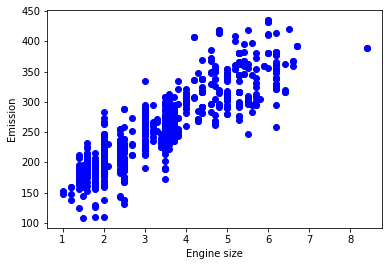

In [9]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### La modélisation
Utilisation du package sklearn pour modéliser les données.

In [10]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.21469413]]
Intercept:  [124.54320354]


Comme mentionné précédemment, __Coefficient__ et __Intercepte__ dans la régression linéaire simple, sont les paramètres de la ligne d'ajustement.
Étant donné qu'il s'agit d'une régression linéaire simple, avec seulement 2 paramètres, et sachant que les paramètres sont l'intercepte et la pente de la droite, sklearn peut les estimer directement à partir de nos données.
Notez que toutes les données doivent être disponibles pour parcourir et calculer les paramètres.

#### Tracer les sorties

Nous pouvons tracer la ligne d'ajustement dans le même graphe représentant les données:

Text(0, 0.5, 'Emission')

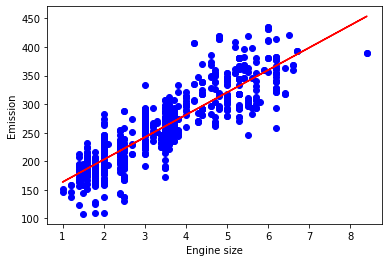

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Évaluation
Nous comparons les valeurs réelles et les valeurs prédites pour calculer la précision d'un modèle de régression. Les mesures d'évaluation jouent un rôle clé dans le développement d'un modèle, car elles fournissent un aperçu sur des domaines qui nécessitent des améliorations.

Il existe différentes métriques d'évaluation du modèle, utilisons ici MSE pour calculer la précision de notre modèle en fonction de l'ensemble de test:
    - Erreur absolue moyenne: C'est la moyenne de la valeur absolue des erreurs. Il s'agit de la mesure la plus simple à comprendre, car il ne s'agit que d'une erreur moyenne.
    - Erreur quadratique moyenne (MSE): l'erreur quadratique moyenne (MSE) est la moyenne de l'erreur quadratique. elle est plus populaire que l’erreur absolue moyenne, car l’accent est davantage mis sur les erreurs importantes. Cela est dû au fait que le terme carré augmente de manière exponentielle les erreurs les plus importantes par rapport aux plus petites.
    - Erreur quadratique moyenne (RMSE).
    - Le R au carré n'est pas une erreur, mais c'est une métrique populaire pour la précision de votre modèle. Il représente la proximité des données par rapport à la droite de régression ajustée. Plus le R au carré est élevé, plus le modèle s'adapte à vos données. Le meilleur score possible est de 1,0 et il peut être négatif (car le modèle peut être arbitrairement pire).

In [12]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 24.84
Residual sum of squares (MSE): 1074.16
R2-score: 0.65


### Régression multilinéaire.
On peut utiliser la régression multilinéaire pour ajuster un modèle qui minimise la " somme résiduelle des carrés" entre la variable dépendante et les variables explicatives.

In [16]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
0,2.0,4,8.5
1,2.4,4,9.6
2,1.5,4,5.9
3,3.5,6,11.1
4,3.5,6,10.6


In [19]:
# create training and testing vars
from sklearn.model_selection import train_test_split

y = np.asanyarray(df.CO2EMISSIONS)
X_train, X_test, y_train, y_test = train_test_split(cdf, y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(960, 3) (960,)
(107, 3) (107,)


In [20]:
# fit a model
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
# The coefficients
print ('Coefficients: ', lm.coef_)
print ('Intercept: ',lm.intercept_)

Coefficients:  [10.84794826  7.291501    9.50872674]
Intercept:  67.50478516204598


On peut calculer l'erreur quadratique moyenne (MSE) et le R au carré évaluer la précision de votre modèle.

In [22]:
from sklearn.metrics import mean_squared_error
test_y_ = lm.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, test_y_))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, test_y_))

Mean squared error: 623.23
Coefficient of determination: 0.86


Nous constatons que la précision est bien meilleure que lorsqu'on a utilisé une seule variable explicative.

### Merci d'avoir suivi cette leçon!
Notebook created by: Saeed Aghabozorgi
    
Copyright © 2018 Cognitive Class. This notebook and its source code are released under the terms of the MIT
License.